<center>
<h1>Matrices de rotación</h1>
<font color="#127a69"><b>
Universidad Politécnica de Guanajuato <br>
Departamento de Ingeniería Robótica <br>
Fundamentos de Robótica
</b></font>
</center>


## Matrices de rotación básicas


In [1]:
from sympy import *
from sympy.matrices import Matrix, eye
init_printing(use_latex=True)

Las matrices de rotación (y de manera general cualquier tipo de matriz) se pueden definir utilizando la clase `Matrix` de librería SymPy. Naturalmente podríamos crear una variable y asignarla directamente al resultado devuelto por dicha clase, cada vez que se requiera, por ejemplo: 

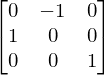

In [2]:
R = Matrix([[0,-1,0], [1,0,0], [0,0,1]])
R

La matriz anterior corresponde a una rotación de 90° alrededor del eje $z$.

El detalle con lo anterior radica en la *tardanza* de estar insertando de manera manual cada uno de los valores correspondientes a las matrices. Una forma de *paliar* lo anterior es definiendo matrices simbólicas y posteriormente sustituir por valores numéricos, lo cual ya sería menos problemático:

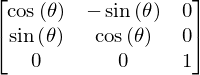

In [3]:
theta = symbols("\\theta")
Rz = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
Rz

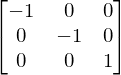

In [7]:
Rz.subs({theta: pi}) # rotación de 180° alrededor de z

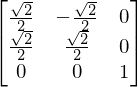

In [8]:
Rz.subs({theta: pi/4}) # rotación de 45° alrededor de z

Lo anterior sigue presentando el inconveniente de tener que llamar el método `subs` para remplazar el valor simbólico por el numérico correspondiente. Una manera más *limpia* sería definir una función que devuelva una matriz de rotación, habiéndole pasado como argumento de entrada un valor de rotación, por ejemplo:

In [9]:
def rotz(theta):
    R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
    return R

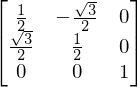

In [10]:
rotz(pi/3)

La ventaja de tener una función radica también en la posibilidad de manejar varios argumentos, y con ello tener la posibilidad de pasar ángulos en grados o en radianes, o inclusive en una misma función agrupar las tres rotaciones básicas:

In [11]:
def rotz2(theta,deg=False):
    """ 
    Ángulo en radianes por default, si deg es True 
    entonces se asume que el ángulo insertado está
    en grados 
    """
    if deg==True:
        theta = theta*(pi/180)
    R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
    return R

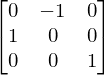

In [12]:
rotz2(90, True) # ángulo en grados

Vamos ahora a definir las tres funciones de matrices de rotación básicas, para utilizarlas posteriormente.

In [13]:
def rotz(theta, deg=False):
    """
    """
    if deg: # Si theta está dada en grados -> convertir a radianes
        theta = rad(theta)
    ct = cos(theta)
    st = sin(theta)
    R = Matrix([[ct, -st, 0],
                  [st, ct, 0],
                  [0, 0, 1]])
    return R


def roty(theta, deg=False):
    """
    """
    if deg: # Si theta está dada en grados -> convertir a radianes
        theta = rad(theta)
    ct = cos(theta)
    st = sin(theta)
    R = Matrix([[ct, 0, st],
                [0, 1, 0],
                [-st, 0, ct]])
    return R


def rotx(theta, deg=False):
    """
    """
    if deg: # Si theta está dada en grados -> convertir a radianes
        theta = rad(theta)
    ct = cos(theta)
    st = sin(theta)
    R = Matrix([[1, 0, 0],
                [0, ct, -st],
                [0, st, ct]])
    return R

## Composición de matrices de rotación

Recordemos que la composición de matrices de rotación dependerá del sistema respecto al cual se realizan las transformaciones. Supongamos que se tiene la siguiente secuencia de rotaciones:

1. Rotación de 30° alrededor de un eje $x$ fijo
2. Rotación de 60° alrededor de un eje $z$ móvil
3. Rotación de 45° alrededor de un eje $y$ fijo
4. Rotación de 90° alrededor de un eje $x$ móvil

La matriz de rotación resultante que describe dichas operaciones está dada por:

$$ R = R_{y,45°} \, R_{x,30°} \, R_{z,60°} \, R_{x,90°}  $$

Utilizando las funciones definidas previamente se puede calcular esta matriz sin muchos inconvenientes:

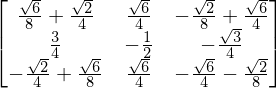

In [14]:
R = roty(pi/4)*rotx(pi/6)*rotz(pi/3)*rotx(pi/2)
R

¿Cómo obtenemos la versión con decimales en lugar de la fraccionaria?, utilizando `evalf`, es decir:

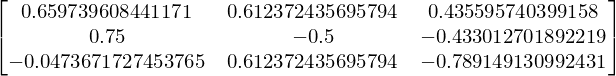

In [23]:
R.evalf()

¿Interesan menos cifras significativas?

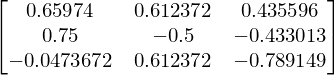

In [25]:
R.evalf(6)